In [1]:
import hydrogibs as hg
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

## QdF

Q10  = 1.30 m3/s


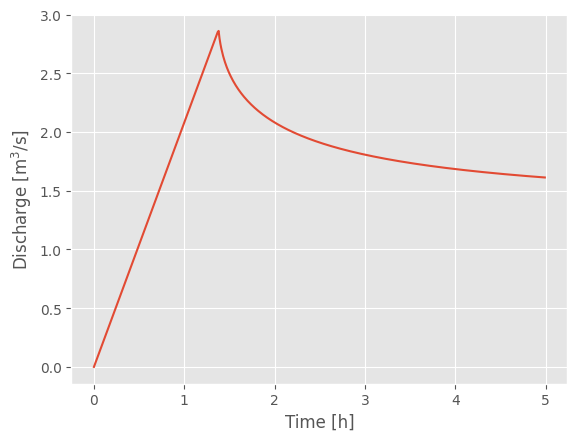

In [2]:
from hydrogibs.misc import crupedix

# Q(T=10) according to Crupédix
Q10 = crupedix(S=1.8, Pj10=72, R=1.0)
# Q10 = 2.0
print(f"{Q10  = :.2f} m3/s")

# Estimation of Q(T=100) according to the QdF method
catchment = hg.QDF.Catchment(model="soyans", specific_duration=1)
rain = hg.QDF.Rain(duration=1,
                   return_period=100,
                   specific_discharge=Q10,
                   discharge_Q10=Q10,
                   dt=0.01)

# QDF.App(rain=rain, catchment=catchment, style="ggplot")
event = rain @ catchment

plt.plot(event.time, event.discharge)
plt.xlabel("Time [h]")
plt.ylabel("Discharge [m$^3$/s]")
plt.show()

## GR4

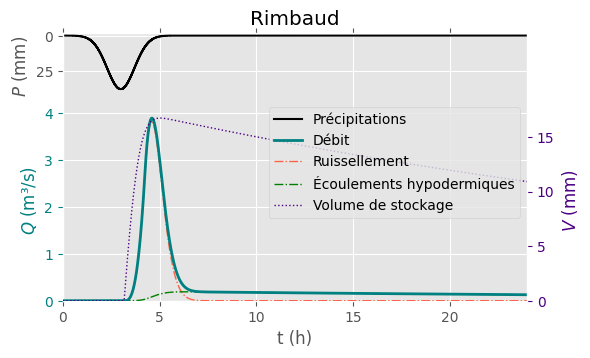

In [3]:
# Laval
X1 = 57.6/100  # [-] dR = X1*dP
X2 = 7.28  # [mm] Interception par la végétation
X3 = 2.4/100  # [h^-1] dH = X3*V*dt, V = (1-X1)*I*dt
X4 = 0.38  # [h] temps de montée tm ≃ td

t0 = 1  # h
I0 = 66.7  # mm/h

dt = 0.01
time = np.arange(0, 24, step=dt)
unit_rain = np.exp(-(time - 3)**2)
unit_rain = unit_rain / np.trapz(x=time, y=unit_rain)
rain = hg.GR4.Rain(time, unit_rain * I0)

event = rain @ hg.GR4.Catchment("Rimbaud", surface=1.8)

Qax, Pax, Vax = event.diagram(show=False).axes

Pax.set_title("Rimbaud")
plt.show()

## Rational method

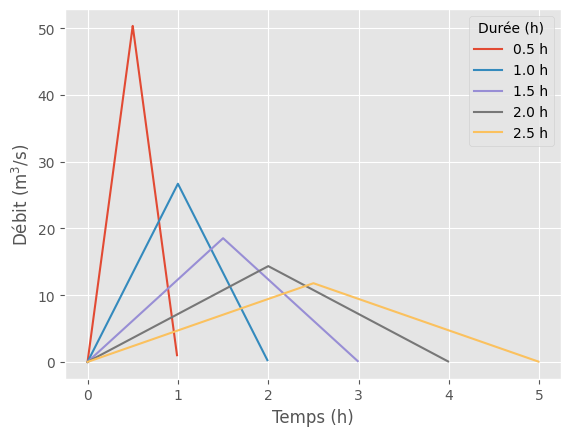

In [4]:
durations = np.array((0.5, 1, 1.5, 2, 2.5))

def rainfall(d, T):
    return 51.0 - 88.2 * (1-(-np.log(1-1/T))**-0.107) * (d/24)**0.4

for d in durations:
    t, Q = hg.rational_method(S=1.8, Cr=0.8, tc=d, ip=rainfall(d, 100)/d)
    plt.plot(t, Q, label=f"{d:.1f} h")
plt.xlabel("Temps (h)")
plt.ylabel("Débit (m$^3$/s)")
plt.legend(title="Durée (h)")
plt.show()

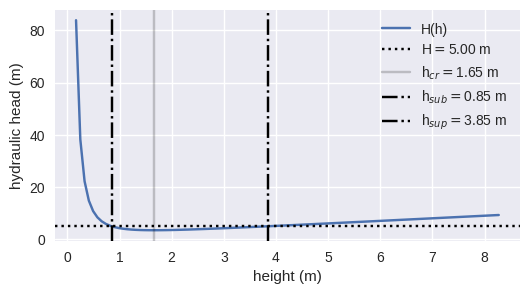

(0.8477074078306939, 3.846930062345624)

In [5]:
from hydrogibs.misc import water_depth_solutions

river_width = 0.3
water_depth_solutions(
    H=5,  # charge hydraulique en m
    Q=2,  # Débit en m^3/s
    Sfunc=lambda h: river_width*h,  # fonction surface de la section selon la hauteur d'eau
    z=1,  # altitude en m, 0 par défaut
    plot=True,  # Pour la représentation graphique suivante de la solution
    figsize=(6, 3)  # taille de la figure
)